# National Coding Week Excercises - R!

## What is this?
This is a jupyter notebook. It is set up with all the data and software dependencies you need to have a go at coding in R/Python. 

## How do I use it?
You can run code by clicking in the code cell and pressing `ctrl`/`cmd` + `enter` or clicking the run button (below)

<img src="images/run-code.png" alt="image" style="height:150px;padding:10px;"/>

You can insert a new code 'chunk' by clicking the + button at the top left of the page (right image) 

<img src="images/insert-code-chunk-1.png" alt="image" style="height:150px;padding:10px;"/>

...and selecting code or markdown with the dropdown (left image).

<img src="images/code-markdown.png" alt="image" style="height:150px;padding:10px;"/>

## Before you start!

Make sure you set the language to R using the change kernel option.

<img src="images/set-kernel.png" alt="image" style="height:150px;padding:10px;"/>

# Coding Challenges:

Try coding in R by having a go at one of our challenges.

## Questions to answer:
* Which city has had the biggest temperature change?
* Which city has had the smallest temperature change?
* Can you make a plot of annual temperature changes for each city or region?
* Can you make a map of temperature changes?

## The Data

The dataset is a collection of daily temperature readings (daing back to 1995) from cities across the globe (split into 7 regions). It was [sourced from Kaggle](https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities) ([original source](https://academic.udayton.edu/kissock/http/Weather/default.htm)) and tidied up a bit to encode missing values and remove data before 995 (there were some readings for year 200 making it difficult to work with). 

The data is stored in the `data` folder. There is one csv of daily temperatures per region. A dataset of monthly mean temperatures for each city is also included in the `data` folder. This is easier to work with because it is much smaller than the daily temperature files. 

## Getting Started

If you are new to R and the tidyverse, have a read through [this cheatsheet](http://datacamp-community-prod.s3.amazonaws.com/c1fae72f-d2d7-4646-9dce-dd0f8fb5c5e8). It will give you the basics of processing and analysis.

# Basics

## Loading packages

R is built on packages which do different things. To use them you need to load them with `library(package_name)`. The following are already installed, load them using this code: 

In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(purrr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Loading the data
You can load the data using the `read_csv` function with the path to the file as the first argument. Don't forget to assign the result. 
E.g.

In [2]:
city_temps <- read_csv("data/monthly-mean-temps.csv")


-- Column specification --------------------------------------------------------
cols(
  Region = col_character(),
  Country = col_character(),
  State = col_logical(),
  City = col_character(),
  Year = col_double(),
  Month = col_double(),
  monthly_average = col_double()
)




To preview the data use the head function on the object you assigned the data to `city_temps`

In [3]:
head(city_temps)

Region,Country,State,City,Year,Month,monthly_average
<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>
Africa,Algeria,NA,Algiers,1995,1,51.41935
Africa,Algeria,NA,Algiers,1995,2,54.80000
Africa,Algeria,NA,Algiers,1995,3,55.00000
Africa,Algeria,NA,Algiers,1995,4,57.19333
Africa,Algeria,NA,Algiers,1995,5,67.40968
Africa,Algeria,NA,Algiers,1995,6,71.72333


# Daily Temperatures

We can have a look at the daily temperatures data using the list files function (I'm displaying it as a tibble)

In [4]:
tibble(files = list.files("data", pattern = "daily", full.names = TRUE))

files
<chr>
data/daily-temperature-africa.csv
data/daily-temperature-asia.csv
data/daily-temperature-australia-south-pacific.csv
data/daily-temperature-europe.csv
data/daily-temperature-middle-east.csv
data/daily-temperature-north-america.csv


You can load all of the daily temperatures data into one data frame by reading each csv and binding them together:

In [5]:
files <- list.files("data", pattern = "daily", full.names = TRUE)
# Map applies a function to each element of a list
all_temps <- map(files, read_csv) %>% bind_rows()


-- Column specification --------------------------------------------------------
cols(
  Region = col_character(),
  Country = col_character(),
  State = col_logical(),
  City = col_character(),
  Month = col_double(),
  Day = col_double(),
  Year = col_double(),
  AvgTemperature = col_double()
)



-- Column specification --------------------------------------------------------
cols(
  Region = col_character(),
  Country = col_character(),
  State = col_logical(),
  City = col_character(),
  Month = col_double(),
  Day = col_double(),
  Year = col_double(),
  AvgTemperature = col_double()
)



-- Column specification --------------------------------------------------------
cols(
  Region = col_character(),
  Country = col_character(),
  State = col_logical(),
  City = col_character(),
  Month = col_double(),
  Day = col_double(),
  Year = col_double(),
  AvgTemperature = col_double()
)



-- Column specification --------------------------------------------------------
cols(
  Region 

## Summarising the data 

You can calculate summary statistics of the dataframe using the `group_by` and `summarise` functions.

In [6]:
regional_max <- 
    city_temps %>% 
    group_by(Region, Year) %>% 
    summarise(max_temp = max(monthly_average, na.rm = TRUE))

head(regional_max)

`summarise()` has grouped output by 'Region'. You can override using the `.groups` argument.



Region,Year,max_temp
<chr>,<dbl>,<dbl>
Africa,1995,94.89032
Africa,1996,94.43226
Africa,1997,93.88571
Africa,1998,96.16207
Africa,1999,93.69355
Africa,2000,95.22903


You can filter the dataset using the `filter` function. This will allow you to select rows using a logical condition. To learn more about filtering read this chapter of [R for Data Science](https://r4ds.had.co.nz/transform.html?q=filter#filter-rows-with-filter).

In [7]:
middle_east_ann_max <- regional_max %>% filter(Region == "Middle East")

head(middle_east_ann_max)

Region,Year,max_temp
<chr>,<dbl>,<dbl>
Middle East,1995,101.2129
Middle East,1996,102.2290
Middle East,1997,101.7742
Middle East,1998,103.3097
Middle East,1999,102.4548
Middle East,2000,103.1645


## Making a basic plot

You can make a basic plot of the data by using ggplot. For an introduction to ggplot, have a read of [this section in R for Data Science (Hadley Wickham)](https://r4ds.had.co.nz/data-visualisation.html#creating-a-ggplot).

The code below uses the filtered dataframe to plot the annual temperature maximums in the Middle East.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



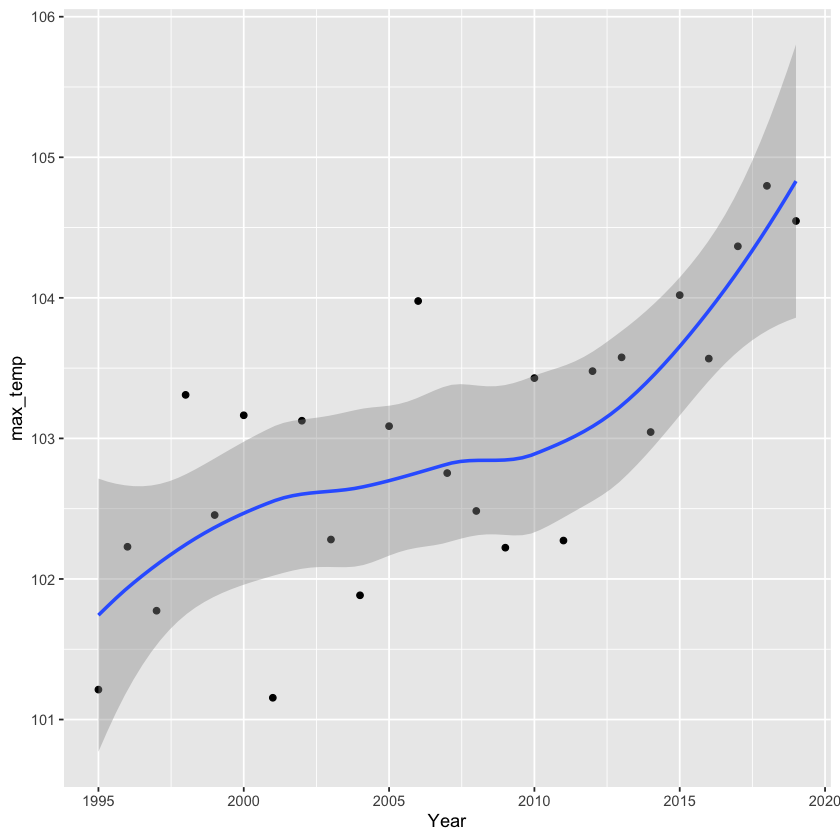

In [8]:
ggplot(middle_east_ann_max,
        aes(x = Year, y = max_temp)) + 
    geom_point() +
    geom_smooth()

# Which city has had the largest temperature change?

Let's look at one of the questions: where has the biggest change in temperature occured? There are few was we can look at this, one of them is to compare between the average temperature in 1995 & 2019 for each city. I'm going to compare them by month since the average could be skewed by extreme temperatures in certain months.

## Filter the data

First I'm going to filter the data for temperatures from 1995 and 2019. 


In [41]:
city_temps_1995_2019 <- 
    city_temps %>% 
    filter(Year %in% c(1995, 2019)) 


Now I'm going to split the temperatures into two columns: temperatures for each city in 1995 and 2019. This will make it much easier to compare the change in temperatures.
I'm using the `pivot_wider` function to do this, specifying the column which the new columns names should come from (`names_from`) and where the vvalues for the new clumns should come from `values_from`. I'm also adding a prefix to the new column names to make it easier to refer to them in R.

In [42]:

city_temps_1995_2019 <- 
    city_temps_1995_2019 %>% 
    pivot_wider(names_from = Year, values_from = monthly_average, names_prefix = "year_")

head(city_temps_1995_2019)

Region,Country,State,City,Month,year_1995,year_2019
<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>
Africa,Algeria,NA,Algiers,1,51.41935,49.72333
Africa,Algeria,NA,Algiers,2,54.80000,51.36786
Africa,Algeria,NA,Algiers,3,55.00000,55.83226
Africa,Algeria,NA,Algiers,4,57.19333,59.62759
Africa,Algeria,NA,Algiers,5,67.40968,65.17778
Africa,Algeria,NA,Algiers,6,71.72333,73.59000


Next it is possible to use dplyr verbs (`mutate`, `group_by` and `summarise`) to compare the temperatures. Once we've calculated summary statistics we can then visualise the data using `ggplot`.

In [29]:
regional_changes <- 
    city_temps_1995_2019 %>% 
    mutate(temp_change = (year_2019 / year_1995) - 1) %>% 
    group_by(Region, Month) %>% 
    summarise(region_average_change = mean(temp_change, na.rm = TRUE))

head(regional_changes)

`summarise()` has grouped output by 'Region'. You can override using the `.groups` argument.



Region,Month,region_average_change
<chr>,<dbl>,<dbl>
Africa,1,0.011463218
Africa,2,0.006290119
Africa,3,0.020855597
Africa,4,0.019290323
Africa,5,0.010669393
Africa,6,0.003411065


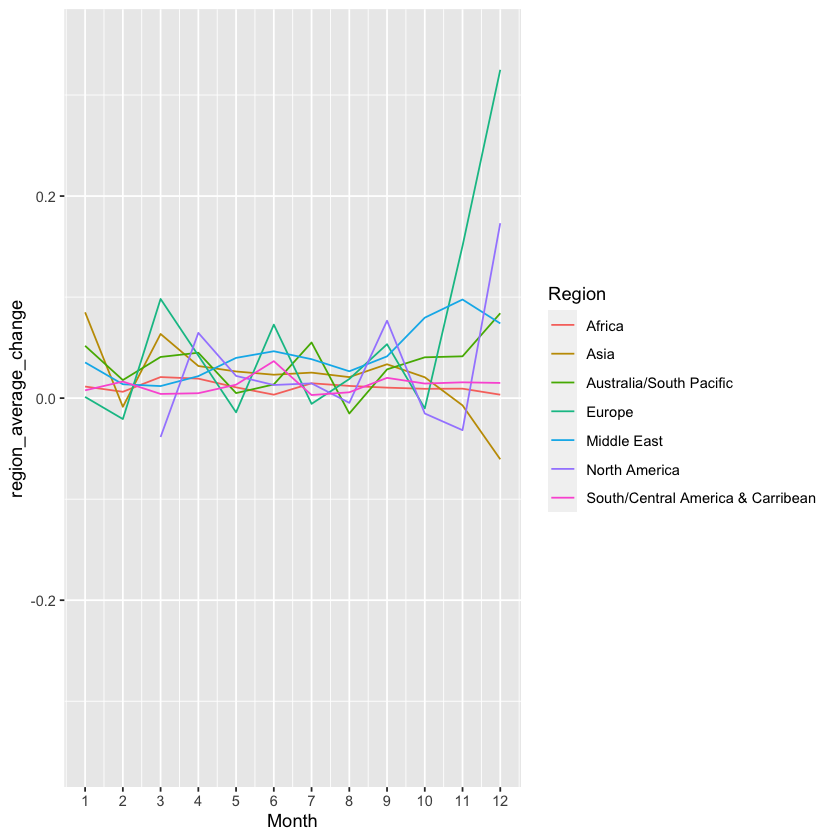

In [39]:
regional_changes %>% 
    ggplot(aes(x = Month, y = region_average_change, colour = Region)) +
    geom_line() + 
    ylim(c(-0.35, 0.35)) + 
    scale_x_continuous(breaks = c(1:12))
